# Credit Card Risk Modelling

#### The German Credit data set contains observations on 30 variables for 1000 past applicants for credit. 

#### Each applicant was rated as “good credit” (700 cases) or “bad credit” (300 cases). 

#### New applicants for credit can also be evaluated on these 30 "predictor" variables. 


##### We want to develop a credit-scoring rule that can be used to determine if a new applicant is a good credit risk or a bad credit risk, based on values for one or more of the predictor variables.

In [1]:
!pip install jovian --upgrade --quiet

In [2]:
import jovian

In [3]:
# Execute this to save new versions of the notebook
jovian.commit(project="credit-card-risk-modelling")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "donatusprince/credit-card-risk-modelling" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/donatusprince/credit-card-risk-modelling


'https://jovian.ai/donatusprince/credit-card-risk-modelling'

In [4]:
import pandas as pd

In [5]:
credit_df = pd.read_csv('german.csv', sep=' ', header=None)

In [6]:
jovian.commit(files=['german.csv'])

<IPython.core.display.Javascript object>

[jovian] Updating notebook "donatusprince/credit-card-risk-modelling" on https://jovian.ai
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/donatusprince/credit-card-risk-modelling


'https://jovian.ai/donatusprince/credit-card-risk-modelling'

#### We're renaming the 21 columns with those given in the attribute list for the given dataset : 

{"chk_acct", "duration", "credit_his", "purpose“, "amount", "saving_acct", "present_emp", "installment_rate", "sex", "other_debtor", "present_resid", "property", "age", "other_install", "housing", "n_credits", "job", "n_people", "telephone", "foreign", "response“}.

In [7]:
credit_df.columns = ['chk_acct', 'duration', 'credit_his', 'purpose', 'amount', 'saving_acct', 'present_emp', 'installment_rate', 'sex', 'other_debtor', 'present_resid', 'property', 'age', 'other_install', 'housing', 'n_credits', 'job', 'n_people', 'telephone', 'foreign', 'response']

The “Response” variable is currently the coding is done as 1 for good and 2 for bad. 

We will subtract 1 from it to make it 0 for good and 1 for bad.

Converting the “Response” variable to an object from its original int variable. 

In [8]:
credit_df.response = (credit_df.response - 1).astype(object)

In [9]:
credit_df.head()

,chk_acct,duration,credit_his,purpose,amount,saving_acct,present_emp,installment_rate,sex,other_debtor,...,property,age,other_install,housing,n_credits,job,n_people,telephone,foreign,response
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,0
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,1
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,0
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,0
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,1


In [10]:
credit_df.describe()

,duration,amount,installment_rate,present_resid,age,n_credits,n_people
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


Summarizing the data set and it’s datatypes.

In [11]:
credit_df.dtypes

chk_acct            object
duration             int64
credit_his          object
purpose             object
amount               int64
saving_acct         object
present_emp         object
installment_rate     int64
sex                 object
other_debtor        object
present_resid        int64
property            object
age                  int64
other_install       object
housing             object
n_credits            int64
job                 object
n_people             int64
telephone           object
foreign             object
response            object
dtype: object

Creating a correlation matrix for all the int columns in the german dataset and visualizing the correlation using heatmap from seaborn.

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [13]:
corr = credit_df.corr()

In [14]:
corr

,duration,amount,installment_rate,present_resid,age,n_credits,n_people
duration,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834
amount,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142
installment_rate,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207
present_resid,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643
age,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201
n_credits,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667
n_people,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000


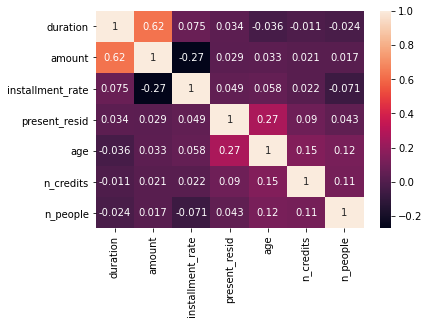

In [15]:
sns.heatmap(corr, annot=True)
plt.show()

### Installment rate vs count of observations by the response variable.

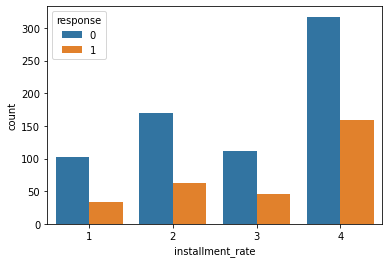

In [16]:
sns.countplot(x='installment_rate', data=credit_df, hue='response')

plt.show()

### Box plot for the age by response variable.

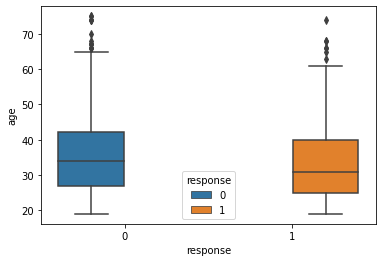

In [17]:
sns.boxplot(x='response', y='age', data=credit_df, hue='response')
plt.show()

### Box plot for the duration by response variable.

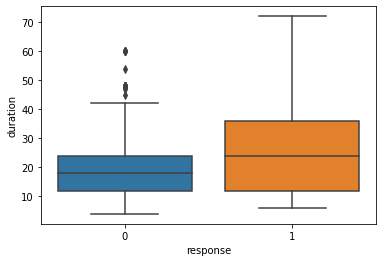

In [18]:
sns.boxplot(x='response', y='duration', data=credit_df)
plt.show()

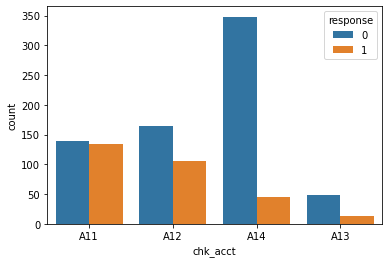

In [19]:
sns.countplot(x='chk_acct', data=credit_df, hue='response')
plt.show()

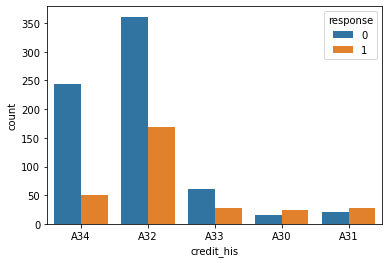

In [20]:
sns.countplot(x='credit_his', data=credit_df, hue='response')
plt.show()

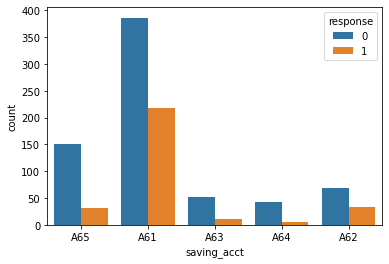

In [21]:
sns.countplot(x='saving_acct', data=credit_df, hue='response')
plt.show()

In [22]:
X = credit_df[['sex' ,'housing', 'saving_acct', 'chk_acct', 'age', 'duration', 'amount']]
y = credit_df['response'].astype(int)

In [23]:
X.dtypes

sex            object
housing        object
saving_acct    object
chk_acct       object
age             int64
duration        int64
amount          int64
dtype: object

### Converting string values into their factor values

In [24]:
from sklearn.preprocessing import OneHotEncoder

In [25]:
cats_cols = list(X.columns[X.dtypes == 'object'])
print("categorical Columns:", cats_cols)

categorical Columns: ['sex', 'housing', 'saving_acct', 'chk_acct']


In [26]:
num_cols = list(X.columns[X.dtypes == 'int'])
print("Numerical Columns:", num_cols)

Numerical Columns: ['age', 'duration', 'amount']


In [27]:
X_dummy = pd.get_dummies(X[cats_cols], drop_first=True)

### Joining the x_dummy and num_cols dataframe

In [28]:
x_new = pd.concat([X_dummy, X[num_cols]], axis=1, join='inner')

In [29]:
# credit_df.age = credit_df.age.apply(str)
# credit_df.duration = credit_df.duration.apply(str)
# credit_df.amount = credit_df.amount.apply(str)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#### To make our calculations more straightforward, we will scale and transform our data values to fit using the Standard Scaler.

In [53]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x_new))

In [54]:
X_train, X_pre_test, y_train, y_pre_test = train_test_split(X, y, test_size=0.2, random_state=123)

#Focus that we are using X_pre_test and y_pre_test. Also test_size is fixed to 0.5

X_val, X_test, y_val, y_test = train_test_split(X_pre_test, y_pre_test , test_size=0.5, random_state=123)  

In [55]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=123)

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
model = LogisticRegression()

In [58]:
model.fit(X_train, y_train)

LogisticRegression()

In [59]:
pred = model.predict(X_test)

### Getting the accuracy score of our predition

In [60]:
from sklearn.metrics import accuracy_score

In [61]:
score = accuracy_score(y_test, pred)
print('The Accuracy Score is', score)

The Accuracy Score is 0.76


### Geting the accuracy of the confusion matrix and all other metrics for our model.

In [62]:
from sklearn.metrics import confusion_matrix, classification_report

In [63]:
accuracy = confusion_matrix(y_test, pred)
print('The Accuracy of Classifier: \n', accuracy)

The Accuracy of Classifier: 
 [[59  7]
 [17 17]]


#### Using the predicted values(pred) and our actual values (y_test), we can create a confusion matrix with the confusion_matrix function.

*Then, using the ravel( ) method of our confusion_matrix function, we can get the True Positive, True Negative, False Positive, and False Negative values*

In [41]:
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
print('True Negative:', tn)
print('False Positive:', fp)
print('False Negative:', fn)
print('True Positive:', tp)

True Negative: 178
False Positive: 22
False Negative: 59
True Positive: 41


In [42]:
matrix = classification_report(y_test, pred)
print('Classification Report: \n', matrix)

Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.89      0.81       200
           1       0.65      0.41      0.50       100

    accuracy                           0.73       300
   macro avg       0.70      0.65      0.66       300
weighted avg       0.72      0.73      0.71       300



#### Computing and visually plotting the ROC-AUC score of the models

In [43]:
from sklearn.metrics import roc_auc_score, roc_curve

In [44]:
auc_score = roc_auc_score(y_test, pred)
auc_score

0.6499999999999999

In [45]:
x_pred, y_pred, _ = roc_curve(y_test, pred)

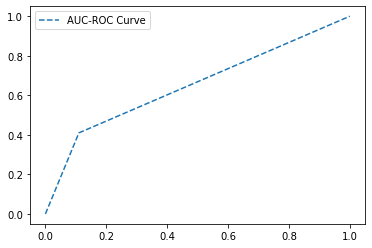

In [46]:
# plot the roc curve for the model
plt.plot(x_pred, y_pred, linestyle='--', label='AUC-ROC Curve')
plt.legend()

plt.show()

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rfc = RandomForestClassifier()

In [49]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [50]:
rfc_pred = rfc.predict(X_test)

In [51]:
score = accuracy_score(y_test, rfc_pred)
print('The Accuracy Score is', score)

The Accuracy Score is 0.74


In [52]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "donatusprince/credit-card-risk-modelling" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/donatusprince/credit-card-risk-modelling


'https://jovian.ai/donatusprince/credit-card-risk-modelling'